In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
import seaborn as sns
import numpy.random as npr
import datetime

In [2]:
xls = pd.ExcelFile("ISE599_Midterm.XLSX")
data = pd.read_excel(xls, "WTI_FuturesCurve")

In [3]:
data.head()

,CL,1,Comdty,CL1 Comdty,Unnamed: 4,Unnamed: 5,CL.1,2,Comdty.1,CL2 Comdty,...,11,Comdty.10,CL11 Comdty,Unnamed: 64,Unnamed: 65,CL.11,12,Comdty.11,CL12 Comdty,Unnamed: 70
0,1,FUT_CUR_GEN_TICKER,PX LAST,VOLUME,Term,NaN,2,FUT_CUR_GEN_TICKER,PX LAST,VOLUME,...,FUT_CUR_GEN_TICKER,PX LAST,VOLUME,Term,NaN,12,FUT_CUR_GEN_TICKER,PX LAST,VOLUME,Term
1,2000-01-31 00:00:00,CLH00,27.64,83938,1,NaN,2000-01-31 00:00:00,CLJ00,26.72,30986,...,CLF01,22.14,1354,11,NaN,2000-01-31 00:00:00,CLG01,21.81,848,12
2,2000-02-01 00:00:00,CLH00,28.22,80801,1,NaN,2000-02-01 00:00:00,CLJ00,27.26,33388,...,CLF01,22.47,1354,11,NaN,2000-02-01 00:00:00,CLG01,22.12,580,12
3,2000-02-02 00:00:00,CLH00,27.55,100243,1,NaN,2000-02-02 00:00:00,CLJ00,26.67,50618,...,CLF01,22.18,771,11,NaN,2000-02-02 00:00:00,CLG01,21.83,28,12
4,2000-02-03 00:00:00,CLH00,28.03,80492,1,NaN,2000-02-03 00:00:00,CLJ00,27.13,38659,...,CLF01,22.57,3856,11,NaN,2000-02-03 00:00:00,CLG01,22.21,225,12


In [4]:
data = data.dropna(axis='columns')
data.head()

,CL,1,Comdty,CL1 Comdty,CL.1,2,Comdty.1,CL2 Comdty,CL.2,3,...,Comdty.9,CL10 Comdty,CL.10,11,Comdty.10,CL11 Comdty,CL.11,12,Comdty.11,CL12 Comdty
0,1,FUT_CUR_GEN_TICKER,PX LAST,VOLUME,2,FUT_CUR_GEN_TICKER,PX LAST,VOLUME,3,FUT_CUR_GEN_TICKER,...,PX LAST,VOLUME,11,FUT_CUR_GEN_TICKER,PX LAST,VOLUME,12,FUT_CUR_GEN_TICKER,PX LAST,VOLUME
1,2000-01-31 00:00:00,CLH00,27.64,83938,2000-01-31 00:00:00,CLJ00,26.72,30986,2000-01-31 00:00:00,CLK00,...,22.49,5380,2000-01-31 00:00:00,CLF01,22.14,1354,2000-01-31 00:00:00,CLG01,21.81,848
2,2000-02-01 00:00:00,CLH00,28.22,80801,2000-02-01 00:00:00,CLJ00,27.26,33388,2000-02-01 00:00:00,CLK00,...,22.84,8690,2000-02-01 00:00:00,CLF01,22.47,1354,2000-02-01 00:00:00,CLG01,22.12,580
3,2000-02-02 00:00:00,CLH00,27.55,100243,2000-02-02 00:00:00,CLJ00,26.67,50618,2000-02-02 00:00:00,CLK00,...,22.55,5921,2000-02-02 00:00:00,CLF01,22.18,771,2000-02-02 00:00:00,CLG01,21.83,28
4,2000-02-03 00:00:00,CLH00,28.03,80492,2000-02-03 00:00:00,CLJ00,27.13,38659,2000-02-03 00:00:00,CLK00,...,22.95,3372,2000-02-03 00:00:00,CLF01,22.57,3856,2000-02-03 00:00:00,CLG01,22.21,225


In [5]:
data.columns

Index([         'CL',             1,     ' Comdty',  'CL1 Comdty',
              'CL.1',             2,   ' Comdty.1',  'CL2 Comdty',
              'CL.2',             3,   ' Comdty.2',  'CL3 Comdty',
              'CL.3',             4,   ' Comdty.3',  'CL4 Comdty',
              'CL.4',             5,   ' Comdty.4',  'CL5 Comdty',
              'CL.5',             6,   ' Comdty.5',  'CL6 Comdty',
              'CL.6',             7,   ' Comdty.6',  'CL7 Comdty',
              'CL.7',             8,   ' Comdty.7',  'CL8 Comdty',
              'CL.8',             9,   ' Comdty.8',  'CL9 Comdty',
              'CL.9',            10,   ' Comdty.9', 'CL10 Comdty',
             'CL.10',            11,  ' Comdty.10', 'CL11 Comdty',
             'CL.11',            12,  ' Comdty.11', 'CL12 Comdty'],
      dtype='object')

In [6]:
#create a dataframe that contains all daily expect return respected to each contract
expect_return = pd.DataFrame()
expect_return['Date'] = data['CL'][1:]
col_index = 6    #start with T2
t = 2            #easy to name a column, start with t2 contract
last_contract = data[' Comdty'][1:] #T1 contract
while col_index != 50:
    contract = "T"+str(t)
    expect_return[contract] = last_contract / data[data.columns[col_index]][1:] - 1

    last_contract = data[data.columns[col_index]][1:]
    col_index += 4
    t += 1
    

In [7]:
expect_return = expect_return.set_index('Date')
expect_return.head()

,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12
Date,,,,,,,,,,,
2000-01-31,0.0344311,0.0288795,0.0256714,0.0246864,0.0223417,0.0194011,0.0189085,0.0174902,0.0168964,0.0158085,0.0151307
2000-02-01,0.0352164,0.0290676,0.0259489,0.025417,0.0231613,0.0198923,0.0198648,0.0185105,0.0170753,0.0164664,0.0158228
2000-02-02,0.0329959,0.0273498,0.0248717,0.0234343,0.0218827,0.0193603,0.0188679,0.017452,0.016408,0.0166817,0.016033
2000-02-03,0.0331736,0.0280409,0.0248544,0.0234499,0.0219334,0.0190397,0.0185497,0.0171527,0.016122,0.0168365,0.0162089
2000-02-04,0.0359454,0.0288462,0.0254077,0.0252722,0.0222576,0.0194489,0.0189926,0.0176471,0.0166595,0.0165002,0.01588


In [8]:

return_table = pd.DataFrame()   #dataframe that contains all daily price respected to each contract
ticker_table = pd.DataFrame()   #dataframe that contains all ticker name respected to each contract
return_table['Date'] = data['CL'][1:]
ticker_table['Date'] = data['CL'][1:]
colIndex = 2       #start with T1
T = 1              #easy to name a column
while colIndex != 50:
    ticker_table['T'+str(T)] = data[data.columns[colIndex-1]][1:]
    return_table['Price'+str(T)] = data[data.columns[colIndex]][1:]
    colIndex += 4
    T += 1

In [9]:
return_table = return_table.set_index('Date')
return_table.head()

,Price1,Price2,Price3,Price4,Price5,Price6,Price7,Price8,Price9,Price10,Price11,Price12
Date,,,,,,,,,,,,
2000-01-31,27.64,26.72,25.97,25.32,24.71,24.17,23.71,23.27,22.87,22.49,22.14,21.81
2000-02-01,28.22,27.26,26.49,25.82,25.18,24.61,24.13,23.66,23.23,22.84,22.47,22.12
2000-02-02,27.55,26.67,25.96,25.33,24.75,24.22,23.76,23.32,22.92,22.55,22.18,21.83
2000-02-03,28.03,27.13,26.39,25.75,25.16,24.62,24.16,23.72,23.32,22.95,22.57,22.21
2000-02-04,28.82,27.82,27.04,26.37,25.72,25.16,24.68,24.22,23.8,23.41,23.03,22.67


In [10]:
ticker_table = ticker_table.set_index('Date')
ticker_table.head()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12
Date,,,,,,,,,,,,
2000-01-31,CLH00,CLJ00,CLK00,CLM00,CLN00,CLQ00,CLU00,CLV00,CLX00,CLZ00,CLF01,CLG01
2000-02-01,CLH00,CLJ00,CLK00,CLM00,CLN00,CLQ00,CLU00,CLV00,CLX00,CLZ00,CLF01,CLG01
2000-02-02,CLH00,CLJ00,CLK00,CLM00,CLN00,CLQ00,CLU00,CLV00,CLX00,CLZ00,CLF01,CLG01
2000-02-03,CLH00,CLJ00,CLK00,CLM00,CLN00,CLQ00,CLU00,CLV00,CLX00,CLZ00,CLF01,CLG01
2000-02-04,CLH00,CLJ00,CLK00,CLM00,CLN00,CLQ00,CLU00,CLV00,CLX00,CLZ00,CLF01,CLG01


In [11]:
def quintiles(inser):
    # ranking method, 11 = largest, 1 = smallest
    outser = pd.qcut(inser, q=11, labels=range(1,12))
    return outser

In [12]:
#define back-test period and find the last trading day of each month as rebalance date
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime(2019, 2, 1)

rebalance_date = pd.date_range(start, end,freq='BM')

In [13]:
expect_return.loc[rebalance_date].head()

,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12
2000-01-31,0.0344311,0.0288795,0.0256714,0.0246864,0.0223417,0.0194011,0.0189085,0.0174902,0.0168964,0.0158085,0.0151307
2000-02-29,0.054766,0.0422688,0.0351533,0.0284615,0.025641,0.0225898,0.0193257,0.0184255,0.0187713,0.0173611,0.0172185
2000-03-31,0.0197119,0.0130568,0.0108696,0.010989,0.0115125,0.0116466,0.0121951,0.0131796,0.0129328,0.0122466,0.0123985
2000-04-28,0.0102041,0.0131213,0.0116653,0.0109801,0.011102,0.0103864,0.0104954,0.0106067,0.0107204,0.0103986,0.0100656
2000-05-31,0.02076,0.0190032,0.0178832,0.0178306,0.0170004,0.0157329,0.0144025,0.014613,0.0148297,0.0150529,0.0152829


In [14]:
# rank tenor contract base on the rebalance date expect return, 
#11 is highest expected return, 1 is lowest expected return

ranking_table = expect_return.loc[rebalance_date].T.apply(quintiles).T
ranking_table = ranking_table.astype(int)
ranking_table.head()

,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12
2000-01-31,11,10,9,8,7,6,5,4,3,2,1
2000-02-29,11,10,9,8,7,6,5,3,4,2,1
2000-03-31,11,9,1,2,3,4,5,10,8,6,7
2000-04-28,2,11,10,8,9,3,5,6,7,4,1
2000-05-31,11,10,9,8,7,6,1,2,3,4,5


In [15]:
long_list = ranking_table.idxmax(axis=1)
long_list.head()

2000-01-31    T2
2000-02-29    T2
2000-03-31    T2
2000-04-28    T3
2000-05-31    T2
Freq: BM, dtype: object

In [16]:
short_list = ranking_table.idxmin(axis=1)
short_list.head()

2000-01-31    T12
2000-02-29    T12
2000-03-31     T4
2000-04-28    T12
2000-05-31     T8
Freq: BM, dtype: object

In [17]:
long_short_portfolio = pd.DataFrame()

In [18]:
temp_long = pd.Series()
temp_short = pd.Series()

# selected daily return for each ticker in one month and put in the seriers
# for example, from 2000-01-31 (i-1) to 2000-02-28 (i), select the price of long target ticker and calculte daily return then
#    put into one "long" series
# i is the last trading day of each month
for i in range(1, len(long_list.index)):
    long_ticker = ticker_table.loc[rebalance_date].iloc[i-1][long_list[i-1]]  # find the ticker in this month i
    short_ticker = ticker_table.loc[rebalance_date].iloc[i-1][short_list[i-1]]
    
    long_temp_return = return_table.loc[long_list.index[i-1]:long_list.index[i]]  #find the price of this ticker in this month
    long_temp_name = ticker_table.loc[long_list.index[i-1]:long_list.index[i]]
    short_temp_return = return_table.loc[short_list.index[i-1]:short_list.index[i]]
    short_temp_name = ticker_table.loc[short_list.index[i-1]:short_list.index[i]]
    
    # calculate the daily return and combine in one series
    temp_long = temp_long.append(long_temp_return.where(long_temp_name.values==long_ticker).bfill(axis=1).iloc[:, 0].pct_change()[1:])
    temp_short = temp_short.append(short_temp_return.where(short_temp_name.values==short_ticker).bfill(axis=1).iloc[:, 0].pct_change()[1:])

long_short_portfolio['long_ret']  = temp_long
long_short_portfolio['short_ret'] = temp_short

In [19]:
long_short_portfolio['port_daily_ret'] = long_short_portfolio['long_ret'] - long_short_portfolio['short_ret']

In [20]:
long_short_portfolio

,long_ret,short_ret,port_daily_ret
2000-02-01,0.020210,0.014214,0.005996
2000-02-02,-0.021643,-0.013110,-0.008533
2000-02-03,0.017248,0.017407,-0.000159
2000-02-04,0.025433,0.020711,0.004722
2000-02-07,-0.012221,-0.020291,0.008070
2000-02-08,-0.014556,-0.005853,-0.008703
2000-02-09,0.024742,0.011775,0.012966
2000-02-10,0.018739,0.008057,0.010681
2000-02-11,0.004599,0.000888,0.003710
2000-02-14,0.030282,0.022183,0.008099


# Q1:Assume we invest 1 dollar in the strategy from day 1, i.e., 1/31/2000, please plot the value of our investment over time.

In [21]:
long_short_portfolio['value'] = (1+long_short_portfolio['port_daily_ret']).cumprod()

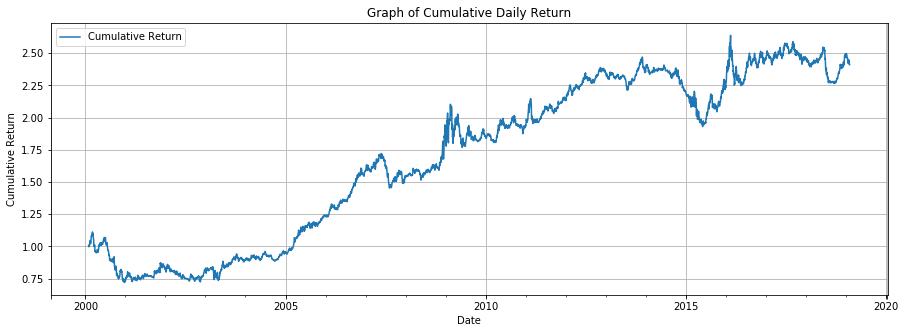

In [22]:
plt.figure(figsize=(15,5))
#(1+long_short_portfolio['port_daily_ret']).cumprod().plot(label='Cum Ret')
long_short_portfolio['value'].plot(label='Cumulative Return')
plt.title('Graph of Cumulative Daily Return')
plt.legend(loc='upper left')
plt.xlabel("Date")
plt.ylabel('Cumulative Return')
plt.grid()
plt.show()

# Q2: Calculate the strategy's calendar year returns, i.e., cumulative returns in each year from 2000 to 2019.

In [23]:
calendar_year_table = long_short_portfolio.copy()
calendar_year_table['calendar_year'] = 0
for year in calendar_year_table.index:
    calendar_year_table.set_value(year, 'calendar_year', year.year)

/Users/keyang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.


In [24]:
calendar_year_table.index.name = 'Date'
calendar_year_table = calendar_year_table.set_index('calendar_year', append=True)
calendar_year_table.head()

,,long_ret,short_ret,port_daily_ret,value
Date,calendar_year,,,,
2000-02-01,2000,0.020210,0.014214,0.005996,1.005996
2000-02-02,2000,-0.021643,-0.013110,-0.008533,0.997412
2000-02-03,2000,0.017248,0.017407,-0.000159,0.997253
2000-02-04,2000,0.025433,0.020711,0.004722,1.001961
2000-02-07,2000,-0.012221,-0.020291,0.008070,1.010047


In [25]:
#calendar_year_table['port_daily_ret'].groupby('calendar_year').mean()

In [26]:
cumulative_ret = (1+calendar_year_table['port_daily_ret']).groupby('calendar_year').cumprod()-1

### Cumulative Returns in each year 2000-2019: 

In [27]:
cumulative_ret.loc[pd.date_range(start, end,freq='BY')].append(cumulative_ret.loc['2019-01-31'])

Date        calendar_year
2000-12-29  2000            -0.273628
2001-12-31  2001             0.150593
2002-12-31  2002            -0.031525
2003-12-31  2003             0.109124
2004-12-31  2004             0.061561
2005-12-30  2005             0.303519
2006-12-29  2006             0.276720
2007-12-31  2007            -0.028359
2008-12-31  2008             0.191923
2009-12-31  2009             0.005784
2010-12-31  2010             0.049253
2011-12-30  2011             0.111286
2012-12-31  2012             0.089036
2013-12-31  2013             0.018446
2014-12-31  2014            -0.084436
2015-12-31  2015             0.039898
2016-12-30  2016             0.083067
2017-12-29  2017            -0.002503
2018-12-31  2018             0.014832
2019-01-31  2019            -0.033114
Name: port_daily_ret, dtype: float64

# Q3:  Calculate the annualized return, annualized risk, and Sharpe ratio (let's assume risk-free rate of 0) of the strategy.

In [28]:
# assume 252 trading days in one year
stats = long_short_portfolio['port_daily_ret'].describe()
stats['Sharpe Ratio'] = stats['mean'] / stats['std'] *np.sqrt(252)

In [29]:
print("Annualized Return: {}".format(stats['mean']*252)) 
print("Annualized Risk: {}".format(stats['std']*np.sqrt(252)))
print("Sharpe Ratio: ", round(stats['Sharpe Ratio'], 4))

Annualized Return: 0.05114489599477759
Annualized Risk: 0.11308217734210567
Sharpe Ratio:  0.4523


# Q4: Identify the maximum drawdown period for this strategy.

In [30]:
long_short_portfolio['cummax'] = long_short_portfolio['value'].cummax()
long_short_portfolio['drawDown'] = (long_short_portfolio['value']/long_short_portfolio['cummax']-1)
portfolio_maxDD = long_short_portfolio['drawDown'].min()
print("Portfolio Maximum Drawdown: ", portfolio_maxDD)

Portfolio Maximum Drawdown:  -0.3529122726020959


In [31]:
long_short_portfolio.loc[long_short_portfolio['drawDown'] == portfolio_maxDD]['drawDown']

2000-12-21   -0.352912
Name: drawDown, dtype: float64

In [32]:
end_period = long_short_portfolio.loc[long_short_portfolio['drawDown'] == portfolio_maxDD]['drawDown'].index

In [33]:
#find the peak before max drawdown
start_period = long_short_portfolio.loc[:'2000-12-21'].loc[long_short_portfolio['drawDown']==0].index[-1].date()

### The Maximum Drawdown Period:

In [34]:
print("Maximum DrawDown Period from {} to {}".format(str(start_period), str(end_period.date[0])))

Maximum DrawDown Period from 2000-03-07 to 2000-12-21


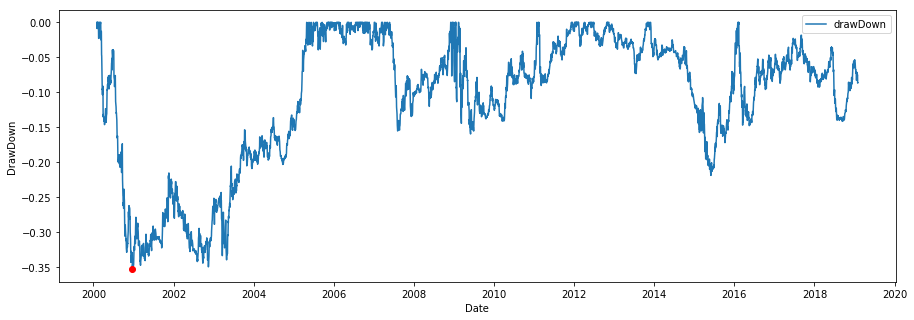

In [35]:
plt.figure(figsize=(15,5))
plt.plot(long_short_portfolio['drawDown'])
plt.plot(long_short_portfolio.loc[long_short_portfolio['drawDown'] == portfolio_maxDD]['drawDown'].index, portfolio_maxDD, 'ro')
plt.xlabel("Date")
plt.ylabel('DrawDown')
plt.legend()
plt.show()

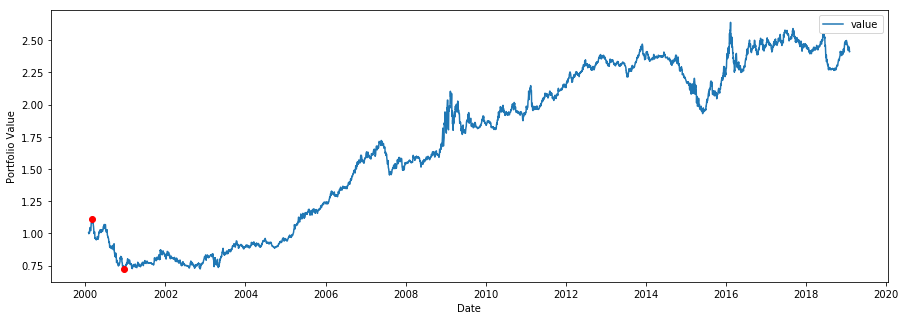

In [36]:
plt.figure(figsize=(15,5))
plt.plot(long_short_portfolio['value'])#.loc[:'2001-01-31'])
plt.plot(long_short_portfolio.loc[long_short_portfolio['drawDown'] == portfolio_maxDD]['drawDown'].index, long_short_portfolio.loc['2000-12-21']['value'],'ro')
plt.plot(long_short_portfolio.loc[:'2000-12-21'].loc[long_short_portfolio['drawDown']==0].index[-1], long_short_portfolio.loc['2000-03-07']['value'], 'ro')
plt.xlabel("Date")
plt.ylabel('Portfolio Value')
plt.legend()
plt.show()



### Zoom In

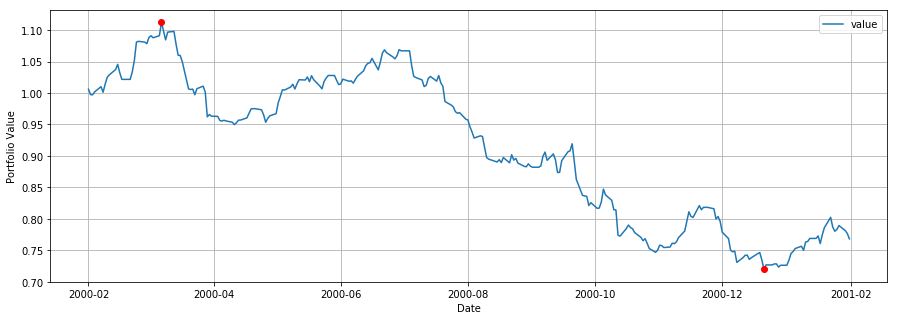

In [37]:
plt.figure(figsize=(15,5))
plt.plot(long_short_portfolio['value'].loc[:'2001-01-31'])
plt.plot(long_short_portfolio.loc[long_short_portfolio['drawDown'] == portfolio_maxDD]['drawDown'].index, long_short_portfolio.loc['2000-12-21']['value'],'ro')
plt.plot(long_short_portfolio.loc[:'2000-12-21'].loc[long_short_portfolio['drawDown']==0].index[-1], long_short_portfolio.loc['2000-03-07']['value'], 'ro')
plt.xlabel("Date")
plt.ylabel('Portfolio Value')
plt.grid()
plt.legend()
plt.show()